In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sse

#Week 12:  stochastic series expansion (SSE) for the Heisenberg model

In [2]:
Lx, Ly = 8, 8
n_updates_measure = 10000


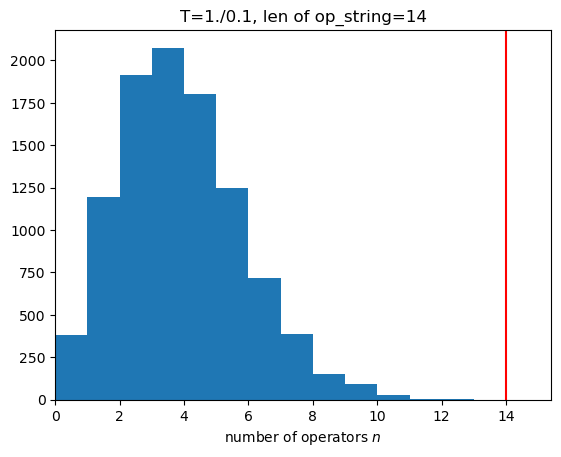

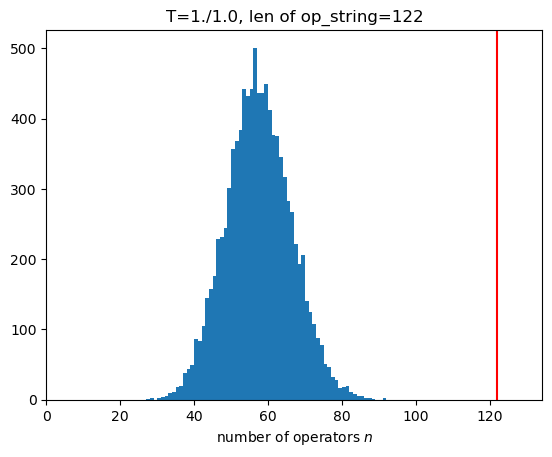

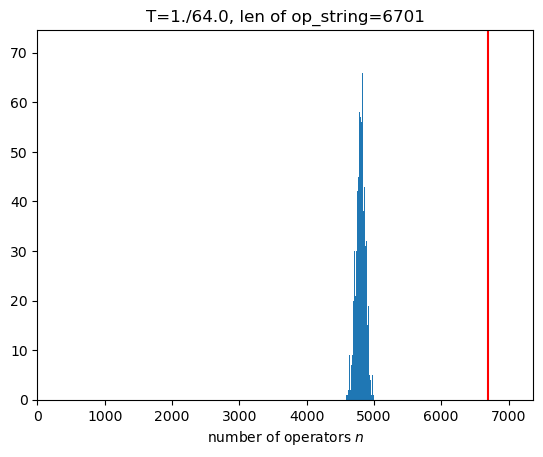

In [3]:
# b)

spins, op_string, bonds = sse.init_SSE_square(Lx, Ly)

for beta in [0.1, 1., 64.]:
    op_string = sse.thermalize(spins, op_string, bonds, beta, n_updates_measure//10)
    ns = sse.measure(spins, op_string, bonds, beta, n_updates_measure)
    plt.figure()
    plt.hist(ns, bins=np.arange(len(op_string)+1))
    plt.axvline(len(op_string), color='r', )  # mark the length of the operator string
    plt.xlim(0, len(op_string)*1.1)
    plt.title("T=1./{beta:.1f}, len of op_string={l:d}".format(beta=beta, l=len(op_string)))
    plt.xlabel("number of operators $n$")


The red bar indicates the size of the operator string after thermalization. These histograms justify that we can fix the length of the operator string M (called $n*$ in the lecture notes). Since M is automatically chosen as large as needed, we effectively take into account all relevant terms of the full series $\sum_{n=0}^\infty$ in the expansion, even if our numerical simulations only use a finite M.



In [7]:
# c)
Ts = np.linspace(2., 0., 20, endpoint=False)
betas = 1./Ts
Ls = [4, 8, 16]


In [8]:
Es_Eerrs = []
for L in Ls:
    print("="*80)
    print("L =", L)
    E = sse.run_simulation(L, L, betas)   
    Es_Eerrs.append(E)


L = 4
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
L = 8
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
L = 16
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000


Text(0, 0.5, 'energy $E$ per site')

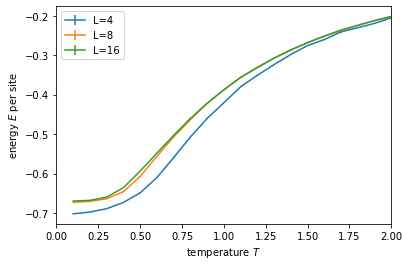

In [9]:
plt.figure()
for E, L in zip(Es_Eerrs, Ls):
    plt.errorbar(Ts, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L=L))
plt.legend()
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")


## Specific heat

In [10]:
# d)

def run_simulation(Lx, Ly, betas=[1.], n_updates_measure=10000, n_bins=10):
    """A full simulation: initialize, thermalize and measure for various betas."""
    spins, op_string, bonds = sse.init_SSE_square(Lx, Ly)
    n_sites = len(spins)
    n_bonds = len(bonds)
    Es_Eerrs = []
    Cs_Cerrs = []
    for beta in betas:
        print("beta = {beta:.3f}".format(beta=beta), flush=True)
        op_string = sse.thermalize(spins, op_string, bonds, beta, n_updates_measure//10)
        Es = []
        Cs = []
        for _ in range(n_bins):
            ns = sse.measure(spins, op_string, bonds, beta, n_updates_measure)
            # energy per site
            n_mean = np.mean(ns)
            E = (-n_mean/beta + 0.25*n_bonds) / n_sites
            Es.append(E)
            Cv = (np.mean(ns**2) - n_mean - n_mean**2)/ n_sites
            Cs.append(Cv)
        E, Eerr = np.mean(Es), np.std(Es)/np.sqrt(n_bins)
        Es_Eerrs.append((E, Eerr))
        C, Cerr = np.mean(Cs), np.std(Cs)/np.sqrt(n_bins)
        Cs_Cerrs.append((C, Cerr))
    return np.array(Es_Eerrs), np.array(Cs_Cerrs)


In [11]:
Es_Errs, Cs_Cerrs = run_simulation(8, 8, betas)


beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000


Text(0, 0.5, 'Specific heat $C_v$ per site')

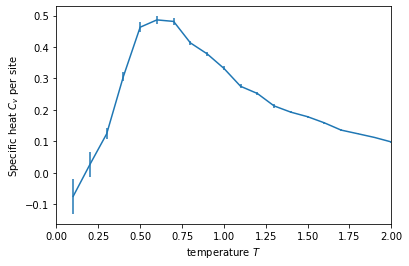

In [12]:
plt.figure()
plt.errorbar(Ts, Cs_Cerrs[:, 0], yerr=Cs_Cerrs[:, 1], label="L={L:d}".format(L=L))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("Specific heat $C_v$ per site")


## Interpretation
We see the behaviour expected from the previous plot considering $C_v= \partial_T \langle E \rangle $.

However, as $T \rightarrow 0$ or $\beta \rightarrow \infty$ the error of $C_v$ blows up! Looking at the formula $C_v = \langle n^2 \rangle - \langle n \rangle^2 - \langle n \rangle$, we see that it consist of larger terms which should cancel to zero. Statistical noise is of the order of the large terms $\langle n^2 \rangle$, hence the relative error in $C_v$ explodes.

This is the essential problem of the infamous "sign problem" of quantum monte carlo (QMC): in many models (e.g. in our case of the SSE if we don't have a bipartite lattice) one encounters negative weights for some configurations in the partition function, and a cancelation of different terms. Similar as for the $C_v$ at low temperatures, this often leads to error bars which are often exponentially large in the system size. Obviously, phases from a "time evolution" lead to a similar problem. There is no generic solution to circumvent the sign problem (it's NP hard!), but for many specific models, there were actually sign-problem free solutions found.

On the other hand, whenever QMC has no sign problem, it is for sure one of the most powerful numerical methods we have. For example, it allows beautiful finite size scaling collapses to extract critical exponents etc. for quantum phase transitions even in 2D or 3D.



#Staggered Magnetization

In [13]:
# e)

def get_staggering(Lx, Ly):
    stag = np.zeros(Lx*Ly, np.intp)
    for x in range(Lx):
        for y in range(Ly):
            s = sse.site(x, y, Lx, Ly)
            stag[s] = (-1)**(x+y)
    return stag


def staggered_magnetization(spins, stag):
    return np.sum(spins * stag)


def measure(spins, op_string, bonds, stag, beta, n_updates_measure):
    """Perform a lot of updates with measurements."""
    ns = []
    ms = []
    for _ in range(n_updates_measure):
        n = sse.diagonal_update(spins, op_string, bonds, beta)
        m = staggered_magnetization(spins, stag)
        sse.loop_update(spins, op_string, bonds)
        ns.append(n)
        ms.append(m)
    return np.array(ns), np.array(ms)


def run_simulation(Lx, Ly, betas=[1.], n_updates_measure=10000, n_bins=10):
    """A full simulation: initialize, thermalize and measure for various betas."""
    spins, op_string, bonds = sse.init_SSE_square(Lx, Ly)
    stag = get_staggering(Lx, Ly)
    n_sites = len(spins)
    n_bonds = len(bonds)
    Es_Eerrs = []
    Cs_Cerrs = []
    Ms_Merrs = []
    for beta in betas:
        print("beta = {beta:.3f}".format(beta=beta), flush=True)
        op_string = sse.thermalize(spins, op_string, bonds, beta, n_updates_measure//10)
        Es = []
        Cs = []
        Ms = []
        for _ in range(n_bins):
            ns, ms = measure(spins, op_string, bonds, stag, beta, n_updates_measure)
            # energy per site
            n_mean = np.mean(ns)
            E = (-n_mean/beta + 0.25*n_bonds) / n_sites
            Es.append(E)
            Cv = (np.mean(ns**2) - n_mean - n_mean**2)/ n_sites
            Cs.append(Cv)
            Ms.append(np.mean(np.abs(ms))/n_sites)  # note that we need the absolute value here!
            # there is a symmetry of flipping all spins which ensures that <Ms> = 0
        E, Eerr = np.mean(Es), np.std(Es)/np.sqrt(n_bins)
        Es_Eerrs.append((E, Eerr))
        C, Cerr = np.mean(Cs), np.std(Cs)/np.sqrt(n_bins)
        Cs_Cerrs.append((C, Cerr))
        M, Merr = np.mean(Ms), np.std(Ms)/np.sqrt(n_bins)
        Ms_Merrs.append((M, Merr))
    return np.array(Es_Eerrs), np.array(Cs_Cerrs), np.array(Ms_Merrs)


In [30]:
# f)
Ls = [4, 8, 12, 16]
Ts = np.linspace(2., 0., 20, endpoint=False)
Ts = np.concatenate([Ts, [0.08, 0.04]])
betas = 1./Ts

Ms_Merrs = []
for L in Ls:
    print("="*80)
    print("L =", L)
    E, C, M = run_simulation(L, L, betas)   
    Ms_Merrs.append(M)


L = 4
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
beta = 12.500
beta = 25.000
L = 8
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
beta = 12.500
beta = 25.000
L = 12
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
beta = 12.500
beta = 25.000
L = 16
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
bet

Text(0, 0.5, 'staggered magnetization $<|M_s|>$ per site')

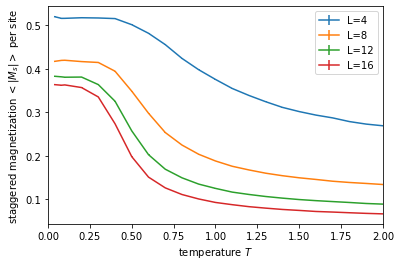

In [31]:
plt.figure()
for M, L in zip(Ms_Merrs, Ls):
    plt.errorbar(Ts, M[:, 0], yerr=M[:, 1], label="L={L:d}".format(L=L))

plt.legend()
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("staggered magnetization $<|M_s|>$ per site")


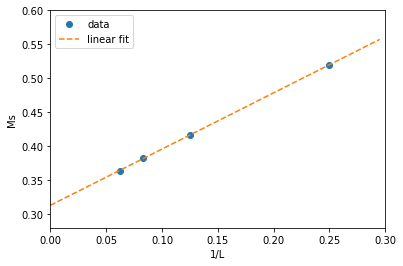


 The extrapolation gives value 0.31318


In [34]:
M_array = np.array([M[-1, 0] for M in Ms_Merrs])
plt.plot(1./np.array(Ls), M_array, 'o', label='data')

fit_coeff = np.polyfit(1./np.array(Ls), M_array, 1)
x = np.arange(0, 0.3, 0.005)
plt.plot(x, np.polyval(fit_coeff, x), '--', label='linear fit')

plt.xlabel('1/L')
plt.ylabel('Ms')
plt.xlim([0, 0.3])
plt.ylim([0.28, 0.6])
plt.legend()
plt.show()

print("\n The extrapolation gives value %.5f" % fit_coeff[-1])


#Honeycomb lattice


In [36]:
def site_honeycomb(x, y, u, Lx, Ly):
    """Defines a numbering of the sites, given positions x and y and u=0,1 within the unit cell"""
    return y * Lx * 2 + x*2 + u


def init_SSE_honeycomb(Lx, Ly):
    """Initialize a starting configuration on a 2D square lattice."""
    n_sites = Lx*Ly*2
    # initialize spins randomly with numbers +1 or -1, but the average magnetization is 0
    spins = 2*np.mod(np.random.permutation(n_sites), 2) - 1
    op_string = -1 * np.ones(10, np.intp)  # initialize with identities
    bonds = []
    for x0 in range(Lx):
        for y0 in range(Ly):
            sA = site_honeycomb(x0, y0, 0, Lx, Ly)
            sB0 = site_honeycomb(x0, y0, 1, Lx, Ly)
            bonds.append([sA, sB0])
            sB1 = site_honeycomb(np.mod(x0+1, Lx), np.mod(y0-1, Ly), 1, Lx, Ly)
            bonds.append([sA, sB1])
            sB2 = site_honeycomb(x0, np.mod(y0-1, Ly), 1, Lx, Ly)
            bonds.append([sA, sB2])
    bonds = np.array(bonds, dtype=np.intp)
    return spins, op_string, bonds


def get_staggering_honeycomb(Lx, Ly):
    stag = np.zeros(Lx*Ly*2, np.intp)
    for x in range(Lx):
        for y in range(Ly):
            stag[site_honeycomb(x, y, 0, Lx, Ly)] = +1
            stag[site_honeycomb(x, y, 1, Lx, Ly)] = -1
    return stag


def run_simulation_honeycomb(Lx, Ly, betas=[1.], n_updates_measure=10000, n_bins=10):
    """A full simulation: initialize, thermalize and measure for various betas."""
    spins, op_string, bonds = init_SSE_honeycomb(Lx, Ly)
    stag = get_staggering_honeycomb(Lx, Ly)
    n_sites = len(spins)
    n_bonds = len(bonds)
    Es_Eerrs = []
    Cs_Cerrs = []
    Ms_Merrs = []
    for beta in betas:
        print("beta = {beta:.3f}".format(beta=beta), flush=True)
        op_string = sse.thermalize(spins, op_string, bonds, beta, n_updates_measure//10)
        Es = []
        Cs = []
        Ms = []
        for _ in range(n_bins):
            ns, ms = measure(spins, op_string, bonds, stag, beta, n_updates_measure)
            # energy per site
            n_mean = np.mean(ns)
            E = (-n_mean/beta + 0.25*n_bonds) / n_sites
            Es.append(E)
            Cv = (np.mean(ns**2) - n_mean - n_mean**2)/ n_sites
            Cs.append(Cv)
            Ms.append(np.mean(np.abs(ms))/n_sites)
        E, Eerr = np.mean(Es), np.std(Es)/np.sqrt(n_bins)
        Es_Eerrs.append((E, Eerr))
        C, Cerr = np.mean(Cs), np.std(Cs)/np.sqrt(n_bins)
        Cs_Cerrs.append((C, Cerr))
        M, Merr = np.mean(Ms), np.std(Ms)/np.sqrt(n_bins)
        Ms_Merrs.append((M, Merr))
    return np.array(Es_Eerrs), np.array(Cs_Cerrs), np.array(Ms_Merrs)


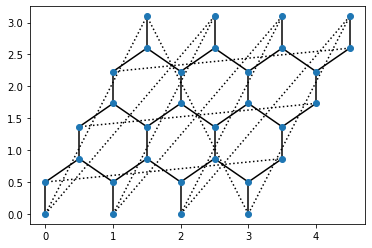

In [37]:
# just to check: plot the generated lattice
L =4
spins, op_string, bonds = init_SSE_honeycomb(L, L)
stag = get_staggering_honeycomb(L, L)
n_sites = len(spins)
n_bonds = len(bonds)

# use non-trivial unit-vectors
unit_vectors = np.array([[1, 0], [0.5, 0.5*np.sqrt(3)]])
dx = np.array([0., 0.5])
site_positions = np.zeros((n_sites, 2), np.float)
for x in range(L):
    for y in range(L):
        pos = x* unit_vectors[0, :] + y*unit_vectors[1, :]     
        s0 = site_honeycomb(x, y, 0, L, L)
        site_positions[s0, :] = pos
        s1 = site_honeycomb(x, y, 1, L, L)
        site_positions[s1, :] = pos + dx
# plot the sites and bonds
plt.figure()
for bond in bonds:
    linestyle = '-'
    s0, s1 = bond
    if np.max(np.abs(site_positions[s0, :] - site_positions[s1, :])) > L/2:
        linestyle = ':'  # plot bonds from the periodic boundary conditions dotted
    plt.plot(site_positions[bond, 0], site_positions[bond, 1], linestyle=linestyle, color='k')
plt.plot(site_positions[:, 0], site_positions[:, 1], marker='o', linestyle='')
plt.show()


In [38]:
Ls = [4, 8, 16]
Ts = np.linspace(2., 0., 20, endpoint=False)
betas = 1./Ts
result_honeycomb = []
for L in Ls:
    print("="*80)
    print("L =", L)
    res = run_simulation_honeycomb(L, L, betas)   
    result_honeycomb.append(res)


L = 4
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
L = 8
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
L = 16
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000


Text(0.5, 0, 'temperature $T$')

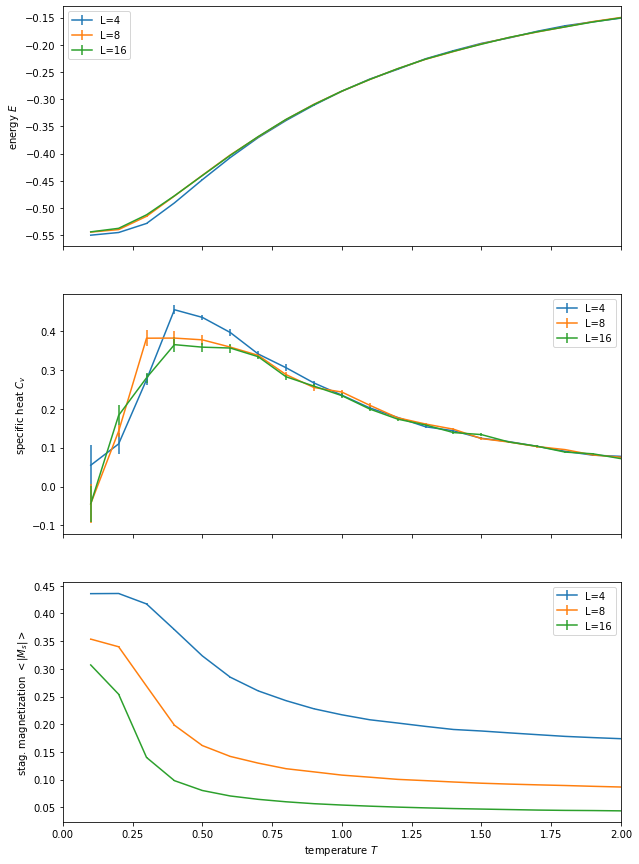

In [39]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 15), sharex=True)
for res, L in zip(result_honeycomb, Ls):
    for data, ax in zip(res, axes):
        ax.errorbar(Ts, data[:, 0], yerr=data[:, 1], label="L={L:d}".format(L=L))
for ax, ylabel in zip(axes, ["energy $E$", "specific heat $C_v$", "stag. magnetization $<|M_s|>$"]):
    ax.legend()
    ax.set_ylabel(ylabel)
axes[0].set_xlim(0, np.max(1./betas))
axes[-1].set_xlabel("temperature $T$")
